## Incorporating negative feedback into simulations

In [1]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import os

import importlib 

import simulation 
import utils
import copy

In [2]:
base_params_dict = {
    "N": 1000, # Population size
    "u": 0.0001, # Environmental change rate 
    "c_I": 0.05, # Cost of individual learning
    "c_AI": 0.0, # Cost of AI update
    "z": 0.66, # Success rate of individual learning
    "s0": 0.85, # Survival probability (non-adapted)
    "s1": 0.93, # Survival probability (adapted)
    "phi": 1., # AI bias parameter
    "epsilon_I": 0.0,  # Social learning error rate for humans
    "epsilon_AI": 0.0, # Social learning error rate for AI
    "mu": 0.005, # Mutation rate
    "n_records": 200000, # Number of steps to average over
    "social_learning_mode": "both", # Who can agents socially learn from: "", "human", "ai", "both"
    "resignation": False, 
    "resignation_hint": 1,
    "ai_individ_learn": False,
    "critical": False, # Is critical social learning enabled
    "ind_penalty_mult": 1., # How much is individual learning probability multiplied by after learning from AI
    "learn_twice": False, # Should agent have second opportunity to learn if first one fails (only one of critical and learn_twice should be on at a time)
    "sim_name": "base" # Name of current simulation (will be used in figure filenames)
}

collective model understanding
0.7823586750000001


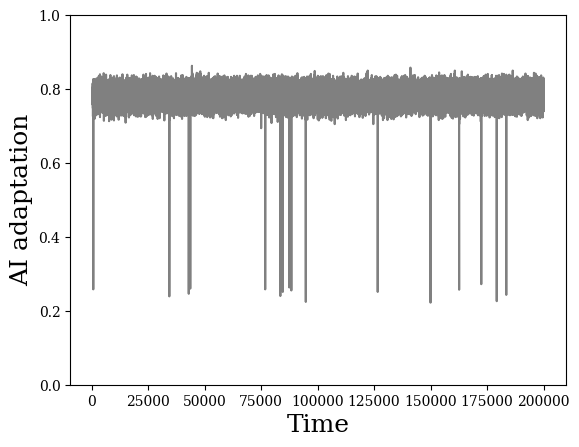

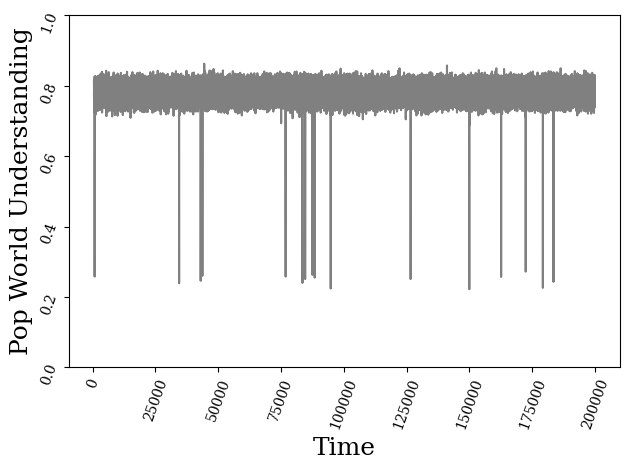

In [3]:

## Feedback loops simulation
### Agents are critical social learners that can learn individually or socially from the AI
### AI learns socially from the mean or mode of the population
### Socially learning from the AI lowers ability to learn individually, learning individually recovers it

params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'ai'
params_dict['ind_penalty_mult'] = 0.9
params_dict['critical'] = True 
params_dict['sim_name'] = 'sec_4_neg_feedback_ai_only'

importlib.reload(simulation)

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation, ind_penalties,  ai_learn_freqs, human_learn_freqs = simulation.run_simulation_feedback(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], 
    n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], resignation_hint=params_dict["resignation_hint"], 
    critical=params_dict["critical"], 
   ind_penalty_mult=params_dict["ind_penalty_mult"], 
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

collective model understanding
0.8830015349999999


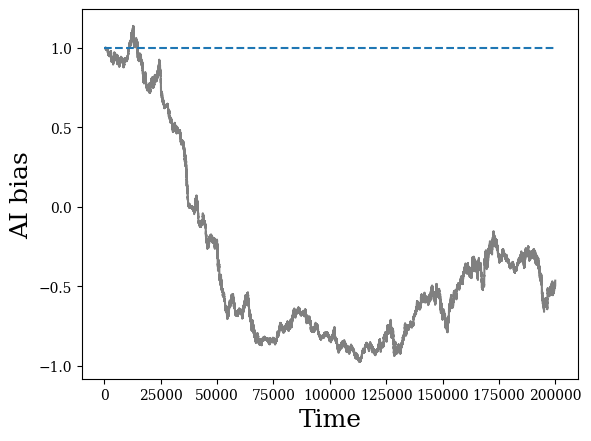

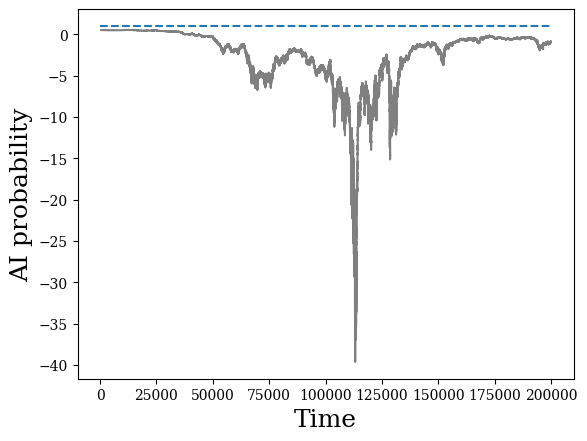

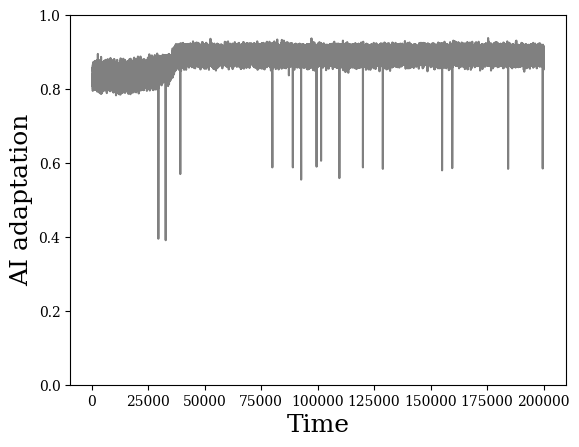

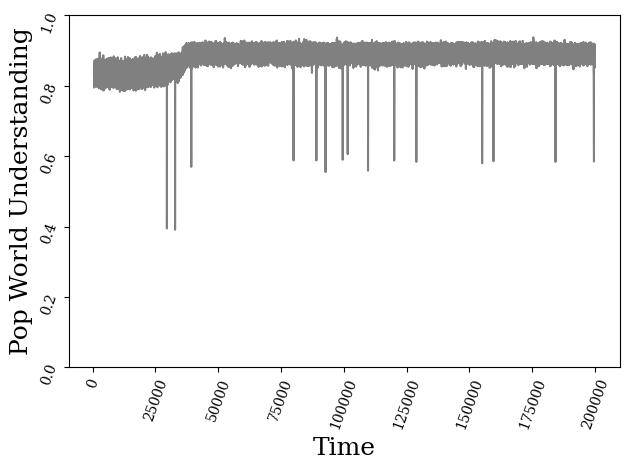

In [ ]:

## Feedback loops simulation 
### Agents are critical social learners that can learn individually or socially from the AI
### AI learns socially from the mean or mode of the population
### Socially learning from the AI lowers ability to learn individually, learning individually recovers it

params_dict = copy.copy(base_params_dict) 
params_dict['social_learning_mode'] = 'both'
params_dict['ind_penalty_mult'] = 0.9
params_dict['critical'] = True 
params_dict['sim_name'] = 'sec_4_neg_feedback_both'

importlib.reload(simulation)

social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation, ind_penalties,  ai_learn_freqs, human_learn_freqs = simulation.run_simulation_feedback(
    N=params_dict["N"], n_generations=params_dict["n_records"], u=params_dict["u"], c_I=params_dict["c_I"], c_AI=params_dict["c_AI"],
    z=params_dict["z"], s0=params_dict["s0"], s1=params_dict["s1"], phi=params_dict["phi"], epsilon_I=params_dict["epsilon_I"], mu=params_dict["mu"], 
    n_records=params_dict["n_records"],
    social_learning_mode=params_dict["social_learning_mode"], resignation=params_dict["resignation"], resignation_hint=params_dict["resignation_hint"], 
    critical=params_dict["critical"], 
   ind_penalty_mult=params_dict["ind_penalty_mult"], #learn_twice=params_dict["learn_twice"]
)

utils.plot_results(params_dict, social_learner_freqs, ai_bias_means, change_points, ai_adaptation, learner_adaptation, social_learner_adaptation)
print(np.mean(learner_adaptation))

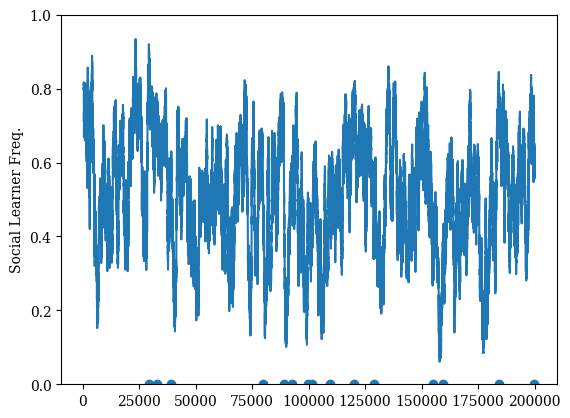

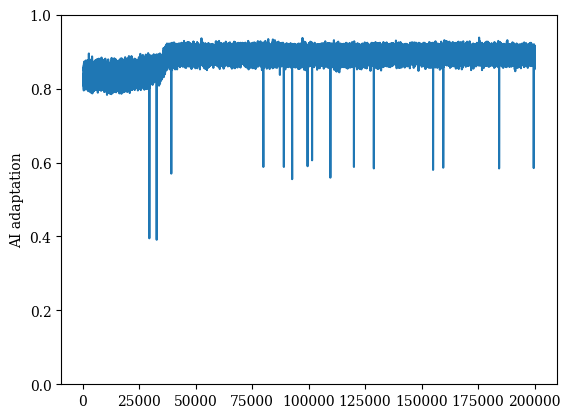

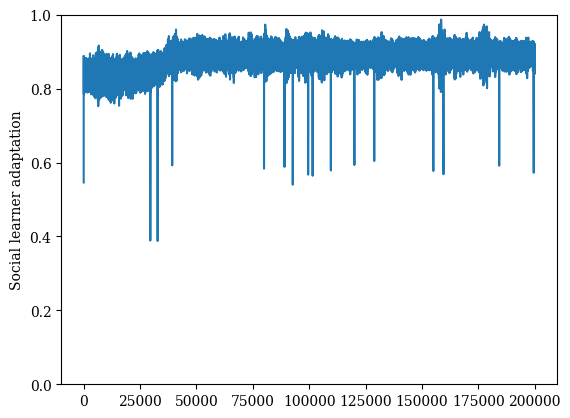

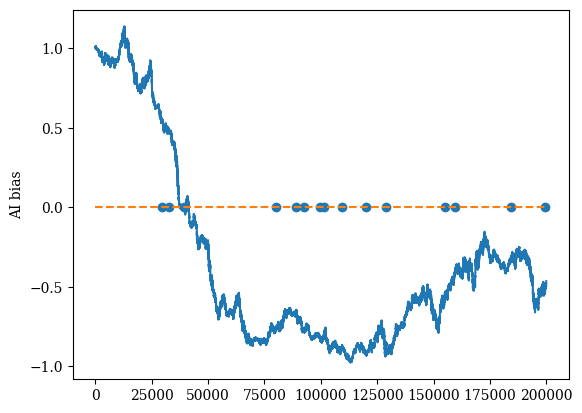

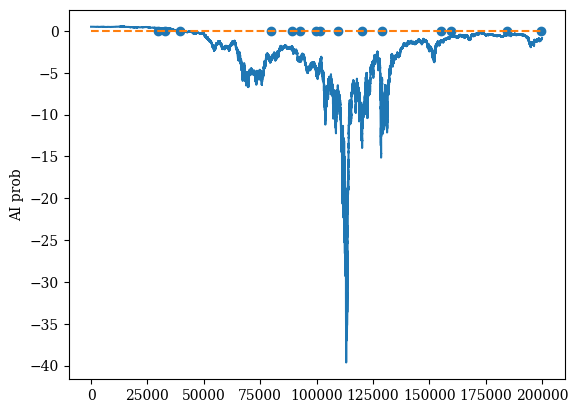

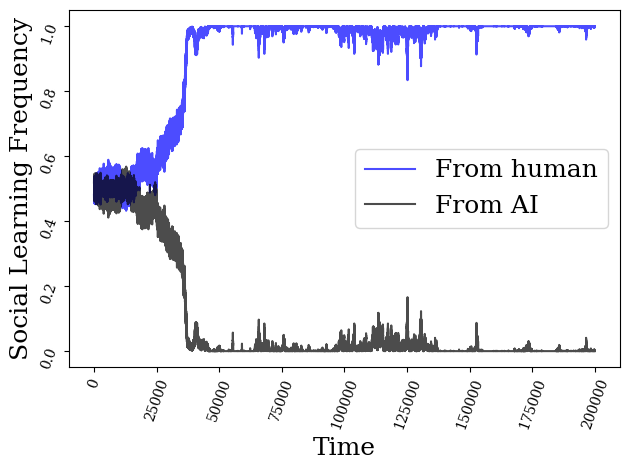

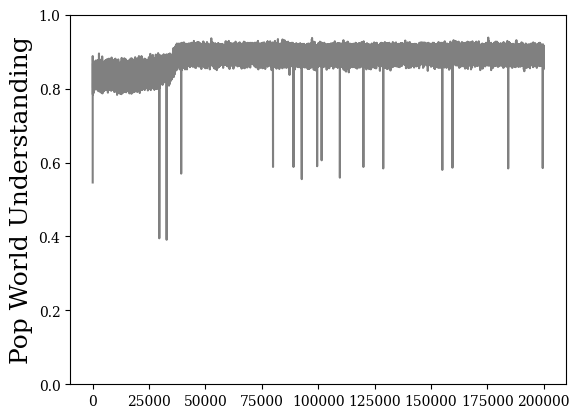

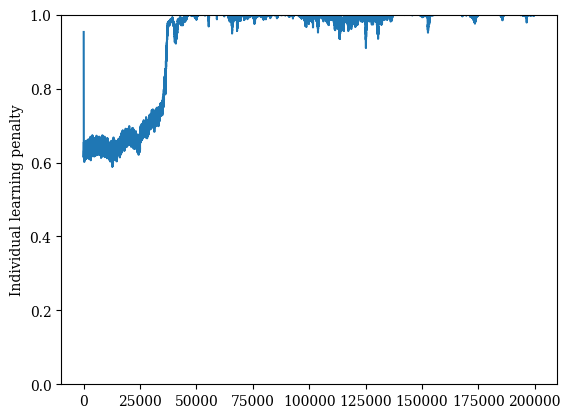

In [5]:
import matplotlib.pyplot as plt

burnin = 500

inds=np.where(change_points)
plt.plot(np.arange(params_dict['n_records'])[burnin:], social_learner_freqs[burnin:])
plt.ylim((0,1))
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("Social Learner Freq.")
plt.show()

plt.plot(np.arange(params_dict['n_records'])[burnin:], ai_adaptation[burnin:])
plt.ylim((0,1))
plt.ylabel("AI adaptation")
plt.show()

window_size = 1
averaged_adaptation = np.convolve(social_learner_adaptation, np.ones(window_size)/window_size, mode='valid')
plt.plot(list(range(params_dict['n_records']))[window_size-1:], averaged_adaptation)
plt.ylim((0,1))
plt.ylabel("Social learner adaptation")
plt.show()

k=200000
inds=np.where(change_points[:k])
plt.plot(range(params_dict['n_records'])[:k], (ai_bias_means)[:k])
plt.plot([0,min(params_dict['n_records'],k)],[0,0],linestyle='--')
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("AI bias")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], (ai_bias_means/(ai_bias_means+1))[:k])
plt.plot([0,min(params_dict['n_records'],k)],[0,0],linestyle='--')
plt.scatter(inds, np.array(change_points)[inds]-1)
plt.ylabel("AI prob")
plt.show()
plt.plot(range(params_dict['n_records'])[:k], human_learn_freqs[:k],'-', label="From human", color='blue', alpha=0.7)
plt.plot(range(params_dict['n_records'])[:k], ai_learn_freqs[:k],label="From AI",color='black', alpha=0.7)
plt.ylim((-0.05,1.05))
plt.ylabel("Social Learning Frequency", fontsize=18)
axis_tick_size = 10
plt.xticks(fontfamily='serif', fontsize=axis_tick_size, rotation=70)
plt.yticks(fontfamily='serif', fontsize=axis_tick_size, rotation=70)
plt.xlabel("Time", fontsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("figures/feedback_critical_fromboth_social_learning_freq.pdf", dpi=400)
plt.show()
plt.plot(range(params_dict['n_records'])[:k], learner_adaptation[:k], color='grey')
plt.ylim((0,1))
plt.ylabel("Pop World Understanding", fontsize=18)
plt.savefig("figures/feedback_critical_fromboth_population_adaptation.pdf", dpi=400)

plt.show()
plt.plot(range(params_dict['n_records'])[:k], ind_penalties[:k])
plt.ylim((0,1))
plt.ylabel("Individual learning penalty")
plt.show()